# <font color='blue'><ins>TASK</ins></font>
- Given the synthetic dataset generated with the snippet below, carry out the following analyses:
    - **Outlier detection with DBSCAN**. 
        - Try to use DBSCAN algorithm with different parameter configurations. How does it model your distribution of objects?
        - How can you estimate a reasonable value of `eps` parameter?
    - **Outlier detection with LOF**. 
        - Try to use LOF (Local Outlier Factor) to assess if an object is an outlier. 
    - Report and discuss the results in both cases.


In [1]:
import pandas as pd
import numpy as np
np.random.seed(10)
from sklearn.metrics import classification_report as clfrep
from matplotlib import pyplot as plt

Create five blobs: notice that one is "less dense" than others, due to higher value of imposed standard deviation. 

(-10.0, 10.0)

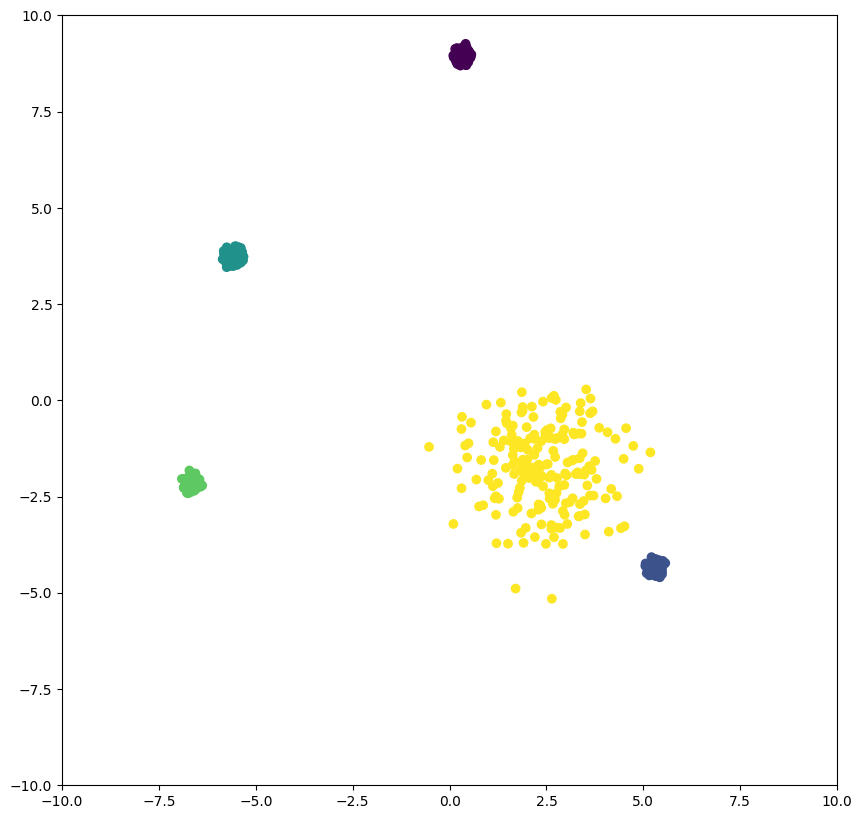

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, 
                  centers=5,
                  cluster_std = [0.1,0.1,0.1,0.1,1], 
                  center_box = [-10,10], 
                  n_features=2, 
                  random_state=23)
plt.figure(figsize=(10,10))
plt.scatter([x[0] for x in X],[x[1] for x in X],c = y)
plt.xlim([-10,10])
plt.ylim([-10,10])

Add outliers to the dataset: outliers are modelled as 20 instances sampled uniformly in the bidimensional space. 

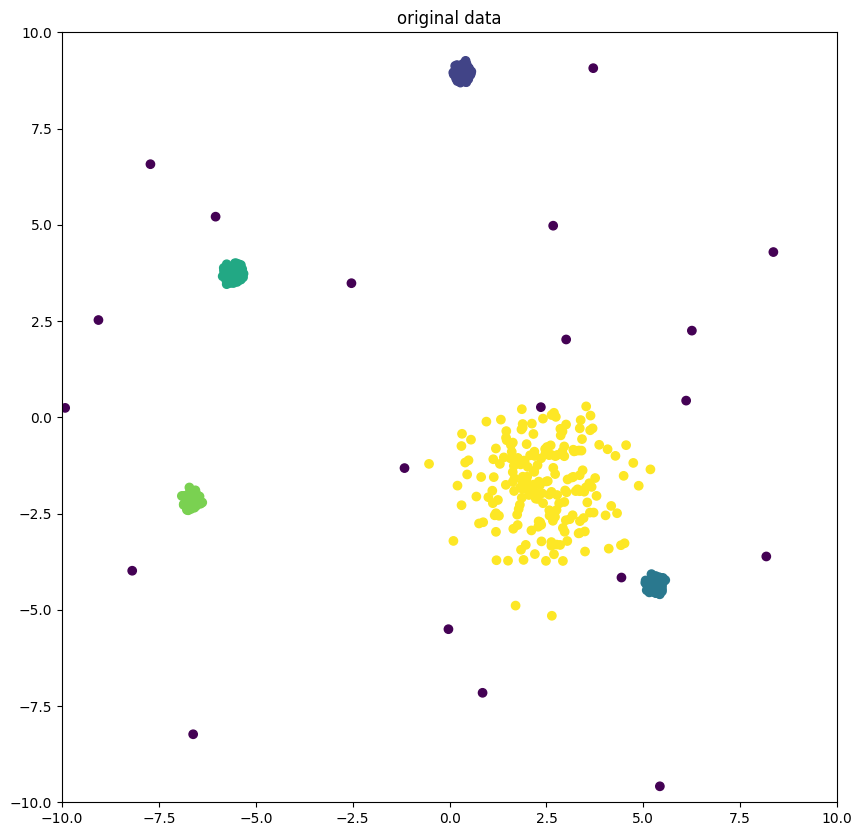

In [3]:
outliers = np.random.uniform(-10,10,(20,2))
data = np.concatenate((X,outliers))
target = np.concatenate((y,np.asarray([-1 for x in range(len(outliers))])))
target_anomaly = np.minimum(target,0)*(-1)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],c = target)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('original data')
plt.show()

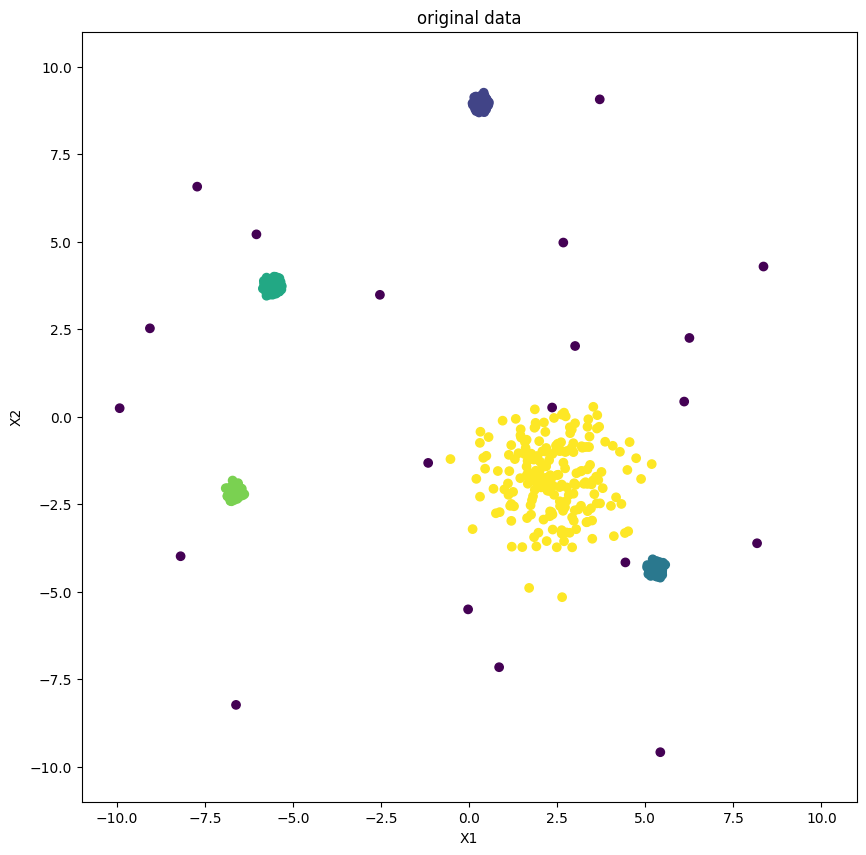

In [4]:
def plot_data(y,title):
    plt.figure(figsize = (10,10))
    plt.scatter(data[:,0],data[:,1], c = y)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim([-11,11])
    plt.ylim([-11,11])
    plt.show()
plot_data(target,'original data')